In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
#Importing the DataSet
Data=pd.read_csv("C:/Users/Gajjala Jaipal Reddy/OneDrive/Desktop/ds assignment/assignment-5/50_Startups.csv")
Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
len(Data)

50

In [5]:
Data.shape

(50, 5)

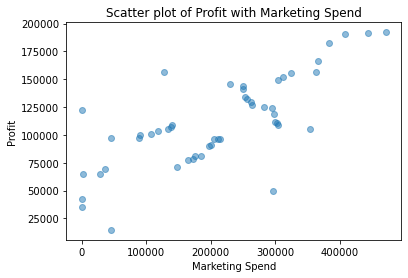

In [6]:
plt.scatter(Data['Marketing Spend'], Data['Profit'],alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

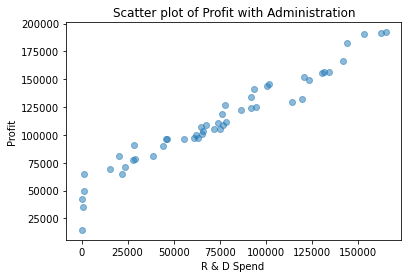

In [7]:
plt.scatter(Data['R&D Spend'],Data['Profit'],alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('R & D Spend ')
plt.ylabel('Profit')
plt.show()

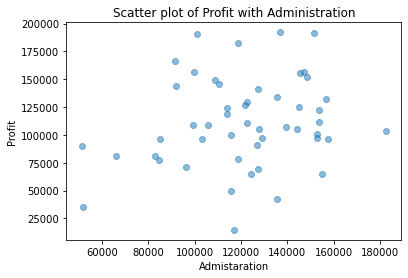

In [8]:
plt.scatter(Data['Administration'],Data['Profit'],alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Admistaration')
plt.ylabel('Profit')
plt.show()

In [9]:
Data['New York_state']=np.where(Data['State']=="New York",1,0)
Data['California_State']=np.where(Data['State']=="California",1,0)
Data['Florida_State']=np.where(Data['State']=="Florida",1,0)

In [10]:
Data.drop(columns=['State'],axis=1, inplace=True)

In [11]:
Data.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York_state,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [12]:
#Create a list of the dependent Variables
dependent_variable='Profit'

In [13]:
#Create a list of the Independent Variables
independent_varibles=Data.columns.tolist()

In [14]:
independent_varibles.remove(dependent_variable)

In [15]:
independent_varibles

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'New York_state',
 'California_State',
 'Florida_State']

In [16]:
#Create the table for independent varibles 
X=Data[independent_varibles].values
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [17]:
Y=Data[dependent_variable].values
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [18]:
#Splitting the dataset into the Training set and Test set
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
#Transforming Data
scaler=MinMaxScaler()

In [23]:
X_train=scaler.fit_transform(x_train)

In [24]:
X_test=scaler.transform(x_test)

In [25]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [26]:
#Training the multiple linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train )

LinearRegression()

In [27]:
Y_pred=regressor.predict(X_test)


In [29]:
math.sqrt(mean_squared_error(y_test, Y_pred))

87846.3211788784

In [32]:
r2_score(y_test, Y_pred)

-5.034112810564127